In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df1 = pd.read_csv("covid_19_india.csv")
df2 = pd.read_csv("HospitalBedsIndia.csv")
df3 = pd.read_csv("ICMRTestingDetails.csv")
df4 = pd.read_csv("ICMRTestingLabs.csv")
df5 = pd.read_csv("IndividualDetails.csv")
df6 = pd.read_csv("population_india_census2011.csv")
df7= pd.read_csv("AgeGroupDetails.csv")

In [147]:
df1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [148]:
df2.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [149]:
df3.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [150]:
df4.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory Supported
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory Supported
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory Supported
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory Supported


In [151]:
df5.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [152]:
df6.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [153]:
df7.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [154]:
#Check for missing values
df1.shape

(806, 9)

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       801 non-null    float64
 1   Date                      801 non-null    object 
 2   Time                      801 non-null    object 
 3   State/UnionTerritory      801 non-null    object 
 4   ConfirmedIndianNational   801 non-null    object 
 5   ConfirmedForeignNational  801 non-null    object 
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
dtypes: float64(4), object(5)
memory usage: 56.8+ KB


In [156]:
df1["ConfirmedIndianNational"].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-', nan], dtype=object)

In [157]:
df1["ConfirmedForeignNational"].unique()

array(['0', '1', '2', '14', '3', '9', '7', '11', '10', '8', '6', '-', nan],
      dtype=object)

In [158]:
df1['ConfirmedIndianNational'].value_counts()

-      355
1      108
3       73
2       33
4       21
      ... 
129      1
49       1
101      1
41       1
125      1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [159]:
df1['ConfirmedIndianNational'].replace("-", np.nan, inplace=True)

In [160]:
df1['ConfirmedForeignNational'].replace("-", np.nan, inplace=True)

In [161]:
df1['ConfirmedIndianNational'].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', nan], dtype=object)

In [162]:
df1['ConfirmedForeignNational'].unique()

array(['0', '1', '2', '14', '3', '9', '7', '11', '10', '8', '6', nan],
      dtype=object)

In [163]:
df1['ConfirmedIndianNational'] = df1['ConfirmedIndianNational'].astype(float)

In [164]:
df1['ConfirmedForeignNational'] = df1['ConfirmedForeignNational'].astype(float)

In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State/UnionTerritory      801 non-null    object 
 1   ConfirmedIndianNational   806 non-null    float64
 2   ConfirmedForeignNational  806 non-null    float64
 3   Cured                     801 non-null    float64
 4   Deaths                    801 non-null    float64
 5   Confirmed                 801 non-null    float64
dtypes: float64(5), object(1)
memory usage: 37.9+ KB


In [166]:
df1["ConfirmedIndianNational"].mean()

12.188340807174887

In [167]:
df1["ConfirmedForeignNational"].mean()

1.4955156950672646

In [168]:
df1["ConfirmedIndianNational"].median()

3.0

In [169]:
df1["ConfirmedForeignNational"].median()

0.0

In [170]:
df1['ConfirmedIndianNational'].fillna(df1["ConfirmedIndianNational"].median(), inplace=True)

In [171]:
df1['ConfirmedForeignNational'].fillna(df1["ConfirmedForeignNational"].mean(), inplace=True)

In [172]:
df1['ConfirmedIndianNational'].unique()

array([  1.,   2.,   3.,   0.,   6.,   7.,   8.,   9.,   4.,  15.,   5.,
        17.,  10.,  11.,  19.,  14.,  22.,  32.,  12.,  23.,  24.,  36.,
        25.,  39.,  44.,  18.,  16.,  26.,  49.,  33.,  60.,  13.,  28.,
        45.,  64.,  21.,  29.,  71.,  30.,  37.,  87.,  86.,  41., 101.,
       125.,  34.,  35.,  42.,  55., 110.,  20., 121.,  40., 129., 127.,
        38., 168., 177.,  52.,  46.,  54.])

In [173]:
df1['ConfirmedForeignNational'].unique()

array([ 0.       ,  1.       ,  2.       , 14.       ,  3.       ,
        9.       ,  7.       , 11.       , 10.       ,  8.       ,
        6.       ,  1.4955157])

In [174]:
df1.drop(['Sno','Date','Time'],axis=1,inplace=True)

In [196]:
df1.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,Kerala,1.0,0.0,0.0,0.0,1.0
1,Kerala,1.0,0.0,0.0,0.0,1.0
2,Kerala,2.0,0.0,0.0,0.0,2.0
3,Kerala,3.0,0.0,0.0,0.0,3.0
4,Kerala,3.0,0.0,0.0,0.0,3.0


In [177]:
df1['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', nan], dtype=object)

In [204]:
df1['State/UnionTerritory'].value_counts()

Kerala                         76
Delhi                          39
Telengana                      39
Rajasthan                      38
Uttar Pradesh                  37
Haryana                        37
Tamil Nadu                     34
Ladakh                         34
Maharashtra                    32
Karnataka                      32
Jammu and Kashmir              32
Punjab                         32
Andhra Pradesh                 29
Uttarakhand                    26
Odisha                         25
Puducherry                     23
West Bengal                    23
Chhattisgarh                   22
Chandigarh                     22
Gujarat                        21
Madhya Pradesh                 20
Himachal Pradesh               20
Bihar                          19
Manipur                        17
Mizoram                        16
Goa                            15
Andaman and Nicobar Islands    15
Assam                           9
Jharkhand                       9
Arunachal Prad

In [201]:
df1["State/UnionTerritory"].mode()

0    Kerala
dtype: object

In [202]:
df1['State/UnionTerritory'].replace(np.nan,'Kerala',inplace=True)

In [203]:
df1['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura'], dtype=object)

In [199]:
from sklearn.preprocessing import LabelEncoder

In [205]:
le = LabelEncoder()
le.fit(df1['State/UnionTerritory'])
df1['State/UnionTerritory']=le.transform(df1['State/UnionTerritory'])

In [207]:
df1.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,15,1.0,0.0,0.0,0.0,1.0
1,15,1.0,0.0,0.0,0.0,1.0
2,15,2.0,0.0,0.0,0.0,2.0
3,15,3.0,0.0,0.0,0.0,3.0
4,15,3.0,0.0,0.0,0.0,3.0


In [ ]:
sns.boxplot(data=df1, x="Confirmed")
plt.show()

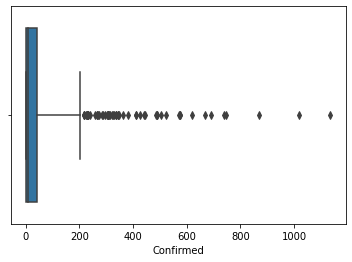

In [209]:
sns.boxplot(data=df1, x="Confirmed",whis=4.5)
plt.show()

In [212]:
from scipy.stats import skew

State/UnionTerritory = -0.047417431735837894


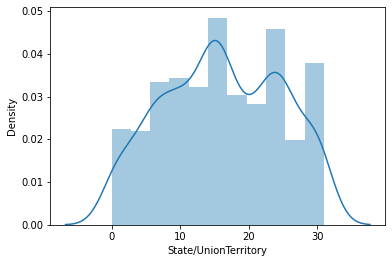

************************************************
ConfirmedIndianNational = 5.460300361294881


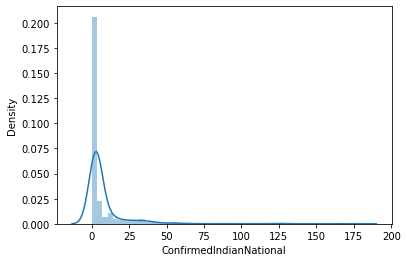

************************************************
ConfirmedForeignNational = 3.6929012020469187


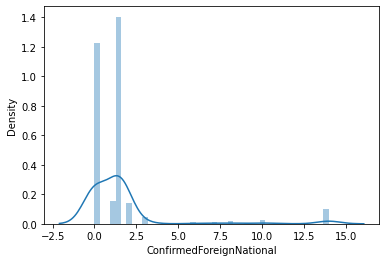

************************************************
Cured = nan


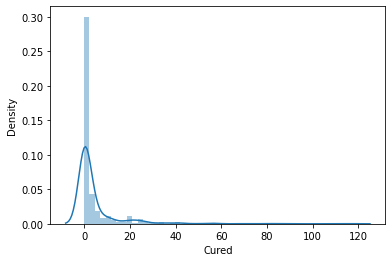

************************************************
Deaths = nan


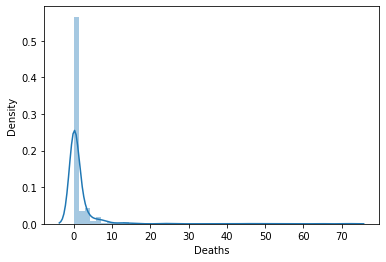

************************************************
Confirmed = nan


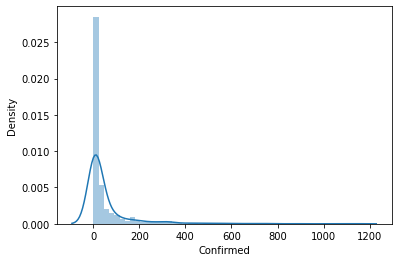

************************************************


In [213]:
for col in df1:
  try:
    print(col, "=", skew(df1[col]))
    sns.distplot(df1[col])
    plt.show()
  except:
    pass
  finally:
    print("************************************************")

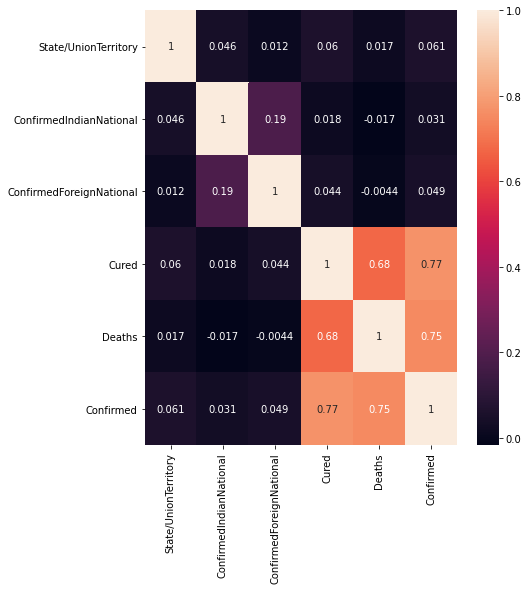

In [215]:
plt.figure(figsize=(7,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [216]:
df2.shape

(38, 14)

In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      30 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
 12  Unnamed: 1

In [223]:
df2.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [226]:
df2.drop(['Unnamed: 12','Unnamed: 13'],axis=1,inplace=True)

In [228]:
df2['NumPrimaryHealthCenters_HMIS'].unique()

array(['27', '1417', '122', '1007', '2007', '40', '813', '9', '4', '534',
       '31', '1770', '500', '516', '702', '343', '2547', '933', '1420',
       '2638', '87', '138', '65', '134', '1360', '521', '2463', '25',
       '1854', '788', '114', '3277', '275', '1374', '29,899', nan],
      dtype=object)

In [230]:
df2['NumCommunityHealthCenters_HMIS'].unique()	

array(['4', '198', '62', '166', '63', '2', '25', '385', '131', '79', '87',
       '179', '207', '229', '3', '324', '430', '17', '29', '10', '21',
       '377', '146', '579', '82', '22', '671', '69', '406', '5,568', nan],
      dtype=object)